<a href="https://colab.research.google.com/github/SagarGuttal/Deep-Learning/blob/main/CNN_model_using_Cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

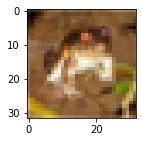

In [7]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[0])

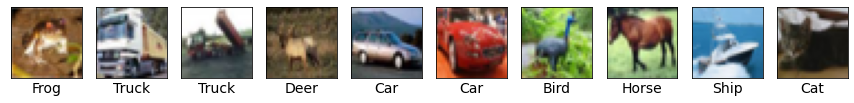

In [8]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(classes[y_train[i][0]],fontsize = 14)
  plt.imshow(X_train[i])

In [9]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
y_train.shape

(50000,)

In [11]:
#Normalise the data 
X_train, X_test = X_train/255, X_test/255

In [14]:
# Building normal Artificial neural network because how it will works
Ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32,3)),
                         layers.Dense(3000,activation = "relu"),
                         layers.Dense(1000, activation = "relu"),
                         layers.Dense(10, activation = "sigmoid")
])

Ann.compile(optimizer = "SGD",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

Ann.fit(X_train, y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8135 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6233 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5423 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4814 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4332 - accuracy: 0.4959


In [17]:
## improve this ANN using CNN
cnn = models.Sequential([
                         #CNN
                         layers.Conv2D(filters = 32, kernel_size=(3,3), activation="relu",input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu",input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         
                         #Dense layera of ANN
                         layers.Flatten(),
                         layers.Dense(3000,activation = "relu"),
                         layers.Dense(1000, activation = "relu"),
                         layers.Dense(10, activation = "softmax")
])

cnn.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

cnn.fit(X_train, y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 18s 5ms/step - loss: 1.3756 - accuracy: 0.5029
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9390 - accuracy: 0.6698
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7153 - accuracy: 0.7495
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5135 - accuracy: 0.8188
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3329 - accuracy: 0.8818


## Lets compare CNN to ANN neural networks CNN gives more accuracy on same eochs because CNN extracts more information using filters(Kernals)

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 17s 56ms/step - loss: 1.0257 - accuracy: 0.7088


[1.0256552696228027, 0.7088000178337097]

In [24]:
predictions = np.argmax(cnn.predict(X_test), axis = 1)
predictions[0]

3

In [26]:
y_test[0][0]

3

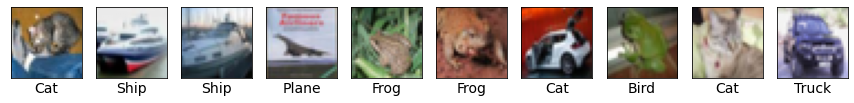

In [27]:
## Predictions
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(classes[predictions[i]],fontsize = 14)
  plt.imshow(X_test[i])

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
score = accuracy_score(y_test,predictions)
score * 100

70.88

In [30]:
confusion_matrix(y_test,predictions)

array([[755,  17,  44,  34,  23,   5,   1,  12,  64,  45],
       [ 20, 780,   7,  11,   7,   5,   5,   7,  33, 125],
       [ 64,   6, 565,  89, 118,  63,  28,  34,  18,  15],
       [ 22,  15,  49, 585,  75, 120,  29,  42,  23,  40],
       [ 22,   1,  54,  84, 695,  31,  21,  68,  16,   8],
       [ 20,   5,  38, 237,  49, 544,  12,  72,  11,  12],
       [  8,  13,  63,  86,  54,  27, 707,   8,  15,  19],
       [  9,   3,  28,  50,  64,  38,   2, 770,   3,  33],
       [ 65,  21,  10,  11,   9,   7,   2,   9, 835,  31],
       [ 21,  50,   5,  11,   4,   6,   2,   9,  40, 852]])